In [564]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [565]:
CHANNEL_CONFIG = "g-a"

In [566]:
TRAIN_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v2_gold_annotation"

In [567]:
TEST_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v2_minx_annotation"

In [568]:
MOTION = "HIT"

# Build DataFrame

In [569]:
def build_df(_DIR):
    file_pattern = os.path.join(_DIR, "*.csv")
    csv_files = glob.glob(file_pattern)
    print(f"A total of {len(csv_files)} CSV files were used in constructing this DataFrame.")
    df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)
    return df

In [570]:
df_train = build_df(TRAIN_DIR)

A total of 16 CSV files were used in constructing this DataFrame.


In [571]:
df_test = build_df(TEST_DIR)

A total of 10 CSV files were used in constructing this DataFrame.


## Remove unneeded columns

In [572]:
match CHANNEL_CONFIG:
    case "gyro":
        df_train = df_train.filter(regex=r'^(gyro|motion)')
        df_test = df_test.filter(regex=r'^(gyro|motion)')
    case "accel":
        df_train = df_train.filter(regex=r'^(accel|motion)')
        df_test = df_test.filter(regex=r'^(accel|motion)')
    case "mag":
        df_train = df_train.filter(regex=r'^(mag|motion)')
        df_test = df_test.filter(regex=r'^(mag|motion)')
    case "ahrs":
        df_train = df_train.filter(regex=r'^(ahrs|motion)')
        df_test = df_test.filter(regex=r'^(ahrs|motion)')
    case "g-a":
        df_train = df_train.filter(regex=r'^(gyro|accel|motion)')
        df_test = df_test.filter(regex=r'^(gyro|accel|motion)')
    case "g-m":
        df_train = df_train.filter(regex=r'^(gyro|mag|motion)')
        df_test = df_test.filter(regex=r'^(gyro|mag|motion)')
    case "a-m":
        df_train = df_train.filter(regex=r'^(accel|mag|motion)')
        df_test = df_test.filter(regex=r'^(accel|mag|motion)')
    case "g-a-m":
        df_train = df_train.filter(regex=r'^(gyro|accel|mag|motion)')
        df_test = df_test.filter(regex=r'^(gyro|accel|mag|motion)')
    case _:
        pass

In [573]:
# df_train.drop(columns=df_train.filter(regex=r'^ahrs').columns, inplace=True)
# df_test.drop(columns=df_test.filter(regex=r'^ahrs').columns, inplace=True)

# Keep values equal to 'X', change everything else to 'Y'

In [574]:
# df_train['motion_type'] = df_train['motion_type'].where(df_train['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [575]:
# df_test['motion_type'] = df_test['motion_type'].where(df_test['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [576]:
df_train.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,gyro_x_1,gyro_y_1,gyro_z_1,accel_x_1,...,accel_x_28,accel_y_28,accel_z_28,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,motion_type
0,-5.048313,0.544225,2.133175,4.55400,8.42100,-4.45695,-4.849900,0.211475,1.034825,4.50105,...,7.38495,-4.68300,-1.177950,6.140613,4.273912,-5.951687,7.384950,-4.68300,-1.177950,HIT
1,0.511087,-0.001787,0.113850,7.98405,3.99495,-2.43300,0.511087,-0.001787,0.113850,7.98405,...,8.63805,-4.89405,-6.553051,5.875513,6.787962,-5.628287,8.638050,-4.89405,-6.553051,HIT
2,0.689975,-0.069025,-0.549450,5.70405,7.45095,-2.50305,0.689975,-0.069025,-0.549450,5.70405,...,7.17705,-5.79900,-4.045050,3.287075,4.430663,-5.384225,7.177050,-5.79900,-4.045050,HIT
3,-2.874850,-0.293012,-0.687638,5.19105,8.42805,-3.96105,-2.874850,-0.293012,-0.687638,5.19105,...,8.50800,-0.89205,-2.488050,3.713600,1.932150,-4.427638,8.508000,-0.89205,-2.488050,HIT
4,0.170775,0.027500,-0.111787,7.15005,3.16905,-0.74505,0.170775,0.027500,-0.111787,7.15005,...,6.98700,-2.47695,-2.062050,-10.236600,12.141250,2.020150,7.918951,-1.33005,-2.650950,HIT


In [577]:
df_test.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,gyro_x_1,gyro_y_1,gyro_z_1,accel_x_1,...,accel_x_28,accel_y_28,accel_z_28,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,motion_type
0,0.409887,1.415975,-2.079412,8.563050,-2.071050,-1.65105,0.385962,1.362900,-2.070750,8.712001,...,3.95205,-1.48395,0.22500,-0.000137,-2.126987,0.906950,4.56495,-0.75900,0.18900,HIT
1,-0.295900,0.000137,-3.612813,7.692000,-2.653050,-1.11705,-0.263588,0.418963,-3.163188,7.069050,...,6.22905,-4.81500,-1.84800,0.771375,-0.755013,0.283112,6.66195,-5.72205,-2.75505,HIT
2,0.395450,0.000000,-4.213412,9.190050,-4.951050,-3.00195,0.228525,0.000000,-4.017337,8.830951,...,5.73300,-3.23400,0.45195,1.046375,-1.387512,1.109900,6.42495,-2.86995,-0.91395,HIT
3,0.752125,1.352725,-2.407212,9.424951,-4.872000,-1.68705,0.000000,0.329450,-1.257987,10.459050,...,4.96695,-8.55900,-2.47500,0.968825,-0.588775,1.654675,4.96695,-8.55900,-2.47500,HIT
4,-0.245713,-2.720988,-6.493712,5.953050,-7.197001,-4.53405,0.000000,-1.947688,-5.850075,6.727050,...,4.53600,-7.51500,-1.49595,-0.277200,-1.816512,-0.000137,4.59600,-7.55595,-2.51100,HIT


<Axes: xlabel='motion_type', ylabel='count'>

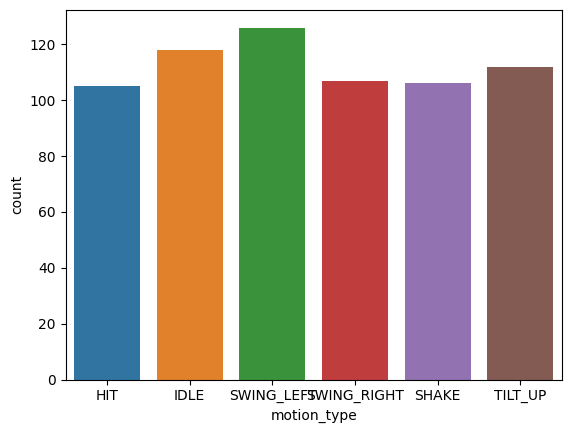

In [578]:
sns.countplot(df_train, x="motion_type", hue="motion_type")

In [579]:
len(df_train)

674

<Axes: xlabel='motion_type', ylabel='count'>

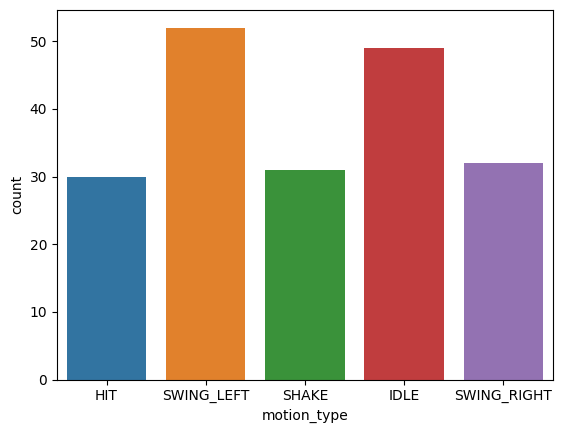

In [580]:
sns.countplot(df_test, x="motion_type", hue="motion_type")

In [581]:
len(df_test)

194

## Get X and y

In [582]:
from sklearn.preprocessing import LabelEncoder

In [583]:
def get_X_and_y(df: pd.DataFrame) -> tuple[np.array, np.array]:
    X = df.drop(columns=["motion_type"]).values.astype(np.float32)
    y = df["motion_type"].values
    
    # n_timesteps = 30
    # channels = []
    # match CHANNEL_CONFIG:
    #     case "accel":
    #         channels = ["accel_x", "accel_y", "accel_z"]
    #     case "gyro":
    #         channels = ["gyro_x", "gyro_y", "gyro_z"]
    #     case "mag":
    #         channels = ["mag_x", "mag_y", "mag_z"]
    #     case "ahrs":
    #         channels = ["ahrs_x", "ahrs_y", "ahrs_z", "ahrs_w"]
    #     case "g-a":
    #         channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z"]
    #     case "g-m":
    #         channels = ["gyro_x", "gyro_y", "gyro_z", "mag_x", "mag_y", "mag_z"]
    #     case "a-m":
    #         channels = ["accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z"]
    #     case "g-a-m":
    #         channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z"]
    #     case _:
    #         channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z", "ahrs_x", "ahrs_y", "ahrs_z", "ahrs_w"]
    # n_channels = len(channels)

    # X = np.zeros((len(df), n_channels, n_timesteps))

    # for t in range(n_timesteps):
    #     for c, channel in enumerate(channels):
    #         col_name = f"{channel}_{t}"
    
    #         X[:, c, t] = X_df[col_name].values
            
    return X, y

In [584]:
X_train, y_train = get_X_and_y(df_train)
X_test, y_test = get_X_and_y(df_test)

In [585]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [586]:
le.classes_

array(['HIT', 'IDLE', 'SHAKE', 'SWING_LEFT', 'SWING_RIGHT', 'TILT_UP'],
      dtype=object)

In [587]:
from sktime.classification.kernel_based import RocketClassifier
from sklearn.linear_model import RidgeClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.classification.deep_learning import InceptionTimeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [588]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [589]:
# clf_minirocket = make_pipeline(
#     StandardScaler(),
#     SVC()
# )

In [590]:
clf_minirocket = SVC()

In [591]:
# clf_minirocket = RocketClassifier(num_kernels=500) 

In [592]:
# clf_minirocket = KNeighborsTimeSeriesClassifier(n_neighbors=1)

In [593]:
clf_minirocket.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [594]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [595]:
y_pred_train = clf_minirocket.predict(X_train)

In [596]:
print(accuracy_score(y_train, y_pred_train))
print(precision_score(y_train, y_pred_train, average="weighted"))
print(recall_score(y_train, y_pred_train, average="weighted"))
print(f1_score(y_train, y_pred_train, average="weighted"))

0.9970326409495549
0.997082096933729
0.9970326409495549
0.9970386704920351


In [597]:
X_train.shape

(674, 180)

In [598]:
X_test.shape

(194, 180)

In [599]:
y_pred_test = clf_minirocket.predict(X_test)

In [600]:
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test, average="weighted", zero_division=0))
print(recall_score(y_test, y_pred_test, average="weighted", zero_division=0))
print(f1_score(y_test, y_pred_test, average="weighted", zero_division=0))

0.9381443298969072
0.9496285627653123
0.9381443298969072
0.9401580495326936


In [601]:
print(confusion_matrix(y_test, y_pred_test))

[[26  0  4  0  0  0]
 [ 0 49  0  0  0  0]
 [ 0  0 30  0  0  1]
 [ 0  1  0 51  0  0]
 [ 0  6  0  0 26  0]
 [ 0  0  0  0  0  0]]


In [602]:
from sklearn.metrics import classification_report

In [603]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       0.88      1.00      0.93        49
           2       0.88      0.97      0.92        31
           3       1.00      0.98      0.99        52
           4       1.00      0.81      0.90        32
           5       0.00      0.00      0.00         0

    accuracy                           0.94       194
   macro avg       0.79      0.77      0.78       194
weighted avg       0.95      0.94      0.94       194



c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_d

In [604]:
from skl2onnx import to_onnx

In [605]:
onx = to_onnx(clf_minirocket, X_train[:1])
with open("svc.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [606]:
import onnxruntime as rt

In [607]:
sess = rt.InferenceSession("svc.onnx", providers=["CPUExecutionProvider"])
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
pred_onx = sess.run([label_name], {input_name: X_train[:1]})[0]
print(pred_onx)

[0]


In [608]:
print(y_train[:1])

[0]


In [609]:
print(repr(X_train[:1]))

array([[ -5.0483127 ,   0.544225  ,   2.133175  ,   4.5540004 ,
          8.4210005 ,  -4.45695   ,  -4.8499    ,   0.211475  ,
          1.034825  ,   4.50105   ,   7.03695   ,  -2.15595   ,
         -4.8499    ,   0.211475  ,   1.034825  ,   4.50105   ,
          7.03695   ,  -2.15595   ,  -4.3267126 ,   0.0996875 ,
          0.1285625 ,   4.28595   ,   7.9489503 ,  -0.27105   ,
         -4.3267126 ,   0.0996875 ,   0.1285625 ,   4.28595   ,
          7.9489503 ,  -0.27105   ,  -4.3267126 ,   0.0996875 ,
          0.1285625 ,   4.28595   ,   7.9489503 ,  -0.27105   ,
         -4.19155   ,   0.1186625 ,  -0.92895   ,  -1.0129501 ,
         13.462951  ,   7.84005   ,  -4.19155   ,   0.1186625 ,
         -0.92895   ,  -1.0129501 ,  13.462951  ,   7.84005   ,
         -4.19155   ,   0.1186625 ,  -0.92895   ,  -1.0129501 ,
         13.462951  ,   7.84005   ,  -4.68435   ,   0.3086875 ,
         -2.8595874 ,  -8.979     ,  41.30295   ,   9.27      ,
         -4.68435   ,   0.3086875 ,  -2.

In [610]:
from joblib import dump


dump(clf_minirocket, "svc.joblib")

['svc.joblib']